# Exploratory Data Analysis

In [14]:
import pandas as pd
import io
import requests
import numpy as np
import seaborn as sns
import scipy.stats as norm
import matplotlib.pyplot as plt

### Overview of data

In [15]:
url="https://aisgaiap.blob.core.windows.net/aiap4-assessment/real_estate.csv"
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
No                                        414 non-null int64
X1 transaction date                       414 non-null float64
X2 house age                              414 non-null float64
X3 distance to the nearest MRT station    414 non-null float64
X4 number of convenience stores           414 non-null int64
X5 latitude                               414 non-null float64
X6 longitude                              414 non-null float64
Y house price of unit area                414 non-null float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [17]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [18]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


#### Observation ####

1. Dataset comprises of **414 observations** and **8 characteristics** (1 dependent, 7 independent)
* Data has only **float** and **integer** values
* **No null/missing values** in all columns


### Numerical data distribution

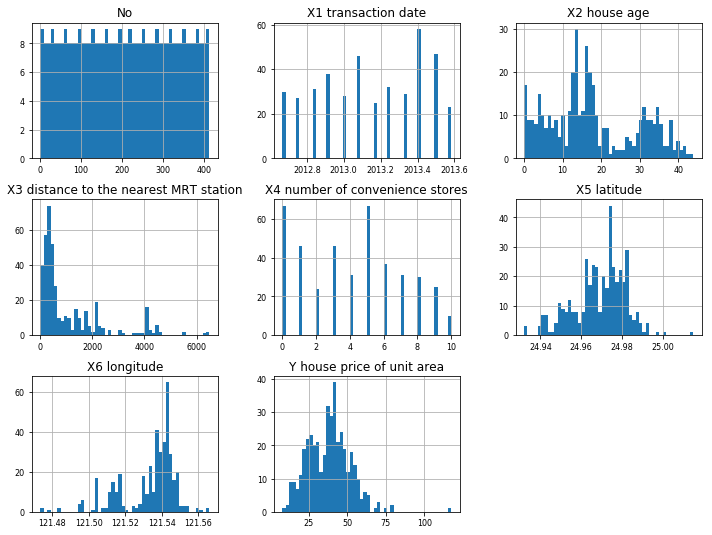

In [19]:
df.hist(figsize=(12, 9), bins=50, xlabelsize=8, ylabelsize=8); 

**Observation**


1. Most of our data comes from houses near a specific MRT station (as seen from `X3 distance to the nearest MRT station`, `X5 latitude`, and `X6 longitude`)

* We have a healthy range of values for the remaining features (`X1 transaction date`, `X2house age`, and `X4 number of convenient stores`).

* Dependent variable `Y house price of unit area` has **one outlier** (at house price above 100) which should be removed. Otherwise, it seems to follow a normal distribution.

**Removing outlier**

In [20]:
df = df[df['Y house price of unit area']<100]
df.shape

(413, 8)

Our data now contains 413 observations. The outlier has been removed.

### Correlation

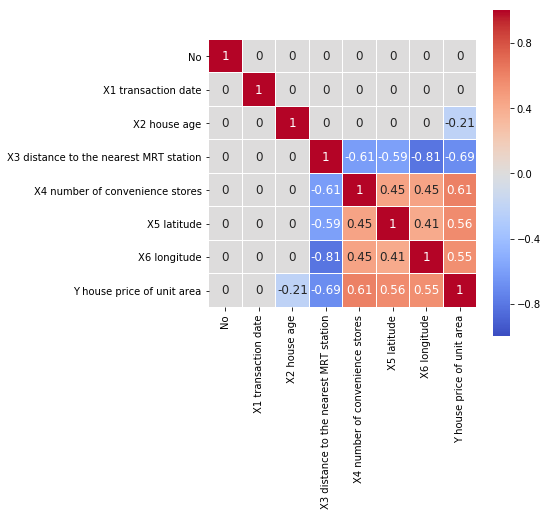

In [21]:
# remove values that have correlation less than 0.2
cm = np.corrcoef(df.values.T)
cm[np.absolute(cm)<.2]="0"

f , ax = plt.subplots(figsize = (6,6))
sns.heatmap(cm, vmin=-1, linewidths=0.01,square=True,annot=True,cmap='coolwarm',
            linecolor="white",xticklabels = df.columns.values ,
            yticklabels = df.columns.values ,annot_kws = {'size':12})

#### Observation

1. Features `No` and `X1 transaction date` have **low correlation** with all other features and can be removed from further analysis
      
      
2.  Independent variable `Y house price of unit area` is **highly correlated** with `X3 distance to the nearest MRT station` and `X4 number of convenience stores`, `X5 latitude` and `X6 longitude`
    - These features should be investigated further


3. It is interesting to note that `X2 house age` has low correlation with all features and `Y house price of unit area`


### Feature : X3 Distance to the nearest MRT station

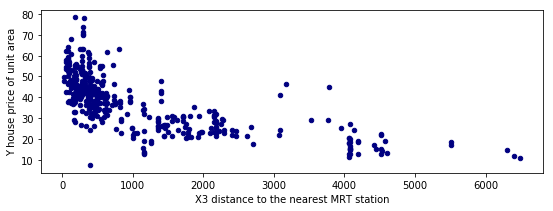

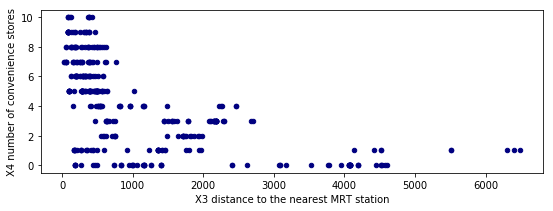

In [22]:
df.plot(kind='scatter', x='X3 distance to the nearest MRT station', y='Y house price of unit area',figsize=(9,3), c="navy")
df.plot(kind='scatter', x='X3 distance to the nearest MRT station', y='X4 number of convenience stores',figsize=(9,3),c="navy")

#### Observation
1. Both `Y house price unit area` and `X4 number of convenience stores` follows an exponentially decreasing function.
    - The `Y house price unit area` decreases drastically for the first 1000m for the first `X3 distance to the MRT station`. Beyond 1000m from the MRT station, `Y house price unit area` does not decrease much.
    
    - Beyond 3000m, the `X4 number of convenience stores drops` to either 1 or 0

### Feature : X4 number of convenience stores

[Text(0, 0.5, 'median house price of unit area')]

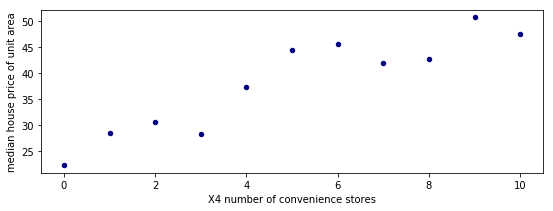

In [23]:
df_mode = df.groupby('X4 number of convenience stores',as_index=False).median()
ax = df_mode.plot(kind='scatter', x='X4 number of convenience stores', y='Y house price of unit area', figsize=(9,3), c="navy")
ax.set(ylabel="median house price of unit area")


#### Observation
1. There is a slight uptrend between`Y house price of unit area` and `X4 number of convenience stores`

### Feature : X5 Latitude

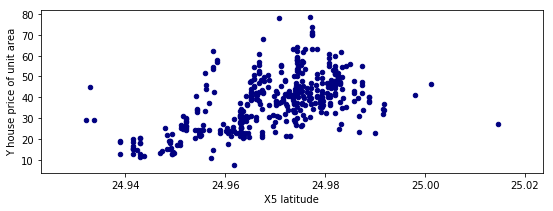

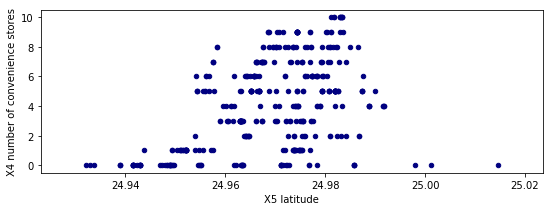

In [24]:
df.plot(kind='scatter', x='X5 latitude', y='Y house price of unit area',figsize=(9,3), c="navy")
df.plot(kind='scatter', x='X5 latitude', y='X4 number of convenience stores',figsize=(9,3),c="navy")

#### Observation

1. There are mild peaks in the `Y house price of unit area` and `X4 number of convenience stores` 
for specific `X5 latitude`

### Feature : X6 Longtitude

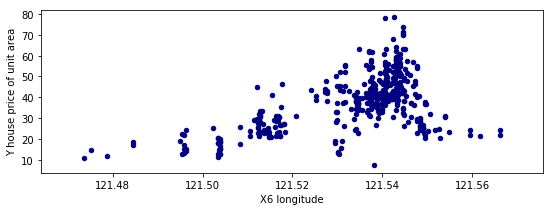

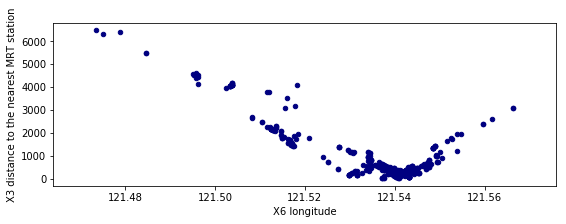

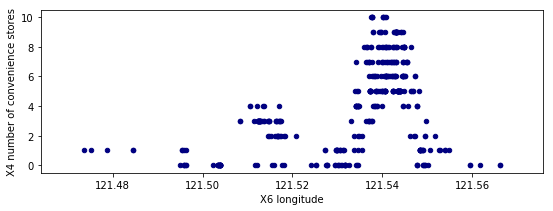

In [25]:
df.plot(kind='scatter', x='X6 longitude', y='Y house price of unit area',figsize=(9,3), c="navy")
df.plot(kind='scatter', x='X6 longitude', y='X3 distance to the nearest MRT station',figsize=(9,3),c="navy")
df.plot(kind='scatter', x='X6 longitude', y='X4 number of convenience stores',figsize=(9,3),c="navy")

#### Observation
1. At `X6 longitude` of about 121.54, there is an obvious peak in `Y house price of unit area`, `X3 distance to the nearest MRT station`, and `X4 number of convenience stores`


### Conclusion and Implications

1. Target variable`Y house price of unit area` does not fluctuate with time of purchase `X1 transaction date` or `X2 house age`
    - **Removing** these features from the model may lead to better accuracy.



2. `Y house price of unit area` is most sensitive to location-related variables. The most impactful is `X3 distance to the nearest MRT station`. These should be included in the model


3. Since `X6 longitude` and `X3 distance to the nearest MRT station` are **highly correlated** (r=0.81), we can consider removing `X6 longitude` when using linear regression (we can keep `X3 distance to the nearest MRT station` since its correlation with `Y house price of unit area` is higher).